
# Data Analysis Project

**Students Names:** Nate Tyler <br>
**Course Name:** MSBA 601
<br>
**Date:** 4/29/25 <br>

---

### Project Overview

In this project, you will work in a team of two and utilize what we have learned in this class to preform an analysis on a dataset. 

The data you choose is up to you! I encourage you to select a dataset that fits your area of expertise. Some of the resources for datasets are listed below. Note that these are just resources I've used in the past. You are not limited to these resources, but it's a place to start.<br>
    <br>
    - [kaggle](https://www.kaggle.com/datasets)<br>
    - [data.gov](https://data.gov/)<br>
    - [google datasets](https://datasetsearch.research.google.com/)<br>
    - [SEC datasets](https://www.sec.gov/data-research/sec-markets-data/financial-statement-data-sets)<br>
    - [dataquest](https://www.dataquest.io/blog/free-datasets-for-projects/)<br>

Your dataset must have at LEAST 10,000 rows of data. Additionally, it should have enough attributes to allow for a meaningful analysis and level of complexity (e.g., a dataset with just two columns for "name" and "birthdate" likely is not going to be enough.)

Once you have selected a dataset, you will be required to perform an analysis

 with a large dataset of at least 10,000 rows. The goal is to:
- Import and explore the dataset.
- Clean and prepare the data for analysis.
- Derive at least 6 key insights from the data using Python and Python libraries. You are welcome to add more coding blocks and more insights. 
- Communicate these insights clearly, professionally, and explain how they can inform decision-making.

---

If you and your group want to utilize the power of Github and use branches, here is the [documentation](https://docs.github.com/en/pull-requests/collaborating-with-pull-requests/proposing-changes-to-your-work-with-pull-requests/about-branches) on how to do so.

The cells below are a guide. Feel free to add code or markdown cells as necessary. 

## 1. Importing Necessary Libraries

In [339]:
# Code block to import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stats



## 2. Loading the Dataset

Load your dataset here. Make sure the dataset has at least 10,000 rows.


In [340]:
# Code block to load the dataset
df = pd.read_csv('HopitalProviderCostReport_2022_FinalProject.csv')



## 3. Data Exploration

Explore the dataset by checking its dimensions, data types, and any missing values.


In [341]:
# Code block for data exploration
print('Data Set Info:')
#print(df.head()) #Shows 5 rows 

#This gives me the shape of the data set and shows the null values. How many & where they're located. 
print(f"Initial Dataset Shape: {df.shape}") #Shows me I have 6,064 rows and 117 Colunns 
df.info()
# Calculate total nulls
total_nulls = df.isnull().sum().sum()

print(f"Total number of null values in the dataset: {total_nulls}") #I have 205,738 Null values accrossed the whole sheet

#nulls per column 
print("\nNull counts per column:")
print(df.isnull().sum())

#Show what percent of the sheet is null values
null_percent = total_nulls/ (6064*117)
print(f'Percent of Nulls in data sheet: {null_percent:.2f}')

#There are nearly all the types of data types present in this data set. We have Floats, Integers and objects 
#print(df.head())


# use medians by network or provider 

Data Set Info:
Initial Dataset Shape: (6064, 117)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6064 entries, 0 to 6063
Columns: 117 entries, rpt_rec_num to Stand-Alone CHIP Charges
dtypes: float64(103), int64(4), object(10)
memory usage: 5.4+ MB
Total number of null values in the dataset: 205738

Null counts per column:
rpt_rec_num                             0
Provider CCN                            0
Hospital Name                           0
Street Address                          3
City                                    0
                                     ... 
Cost To Charge Ratio                 1464
Net Revenue from Medicaid            1679
Medicaid Charges                     1691
Net Revenue from Stand-Alone CHIP    5078
Stand-Alone CHIP Charges             5058
Length: 117, dtype: int64
Percent of Nulls in data sheet: 0.29



**Guiding Questions:**
- What columns are available in the data?
- Are there any columns with missing values?
- What data types are present?



## 4. Data Cleaning/Engineering

Clean the data to ensure consistency and handle any missing values or outliers. Also use this space to add attributes that bolster your analysis. 


In [342]:
# Code block for data cleaning/engineering
# Fix Categorical Data/nulls
categorical_data = ['Rural Versus Urban', 'State Code', 'CCN Facility Type']
for col in categorical_data:
    df[col] = df[col].fillna('Unknown')  # Fill missing categorical values with 'Unknown'
    df[col] = df[col].astype(str)  # Convert to string


# Clean and fill numeric data with medians
numeric_data = ['Total Costs', 'Net Income', 'Total Salaries From Worksheet A', 'Cost of Charity Care', 'Number of Beds', 'FTE - Employees on Payroll']
for col in numeric_data:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, non-numeric to NaN
    df[col] = df[col].fillna(df[col].median())  # Fill NaN with median


# Replace zero values in Total Costs and Number of Beds with medians 
df['Total Costs'] = df['Total Costs'].replace(0, df['Total Costs'].median())
df['Number of Beds'] = df['Number of Beds'].replace(0, df['Number of Beds'].median())


# Facility type code to full name for readability 
facility_type = {
    'STH': 'Short-term (General and Specialty) Hospitals',
    'CAH': 'Critical Access Hospitals',
    'PH': 'Psychiatric Hospitals',
    'RH': 'Rehabilitation Hospitals',
    'LTCH': 'Long-Term Care Hospitals',
    'CH': 'Children’s Hospitals',
    'RNMHC': 'Religious Non-medical Health Care Institutions',
    'ORD': 'Hospitals participating in operating room demonstration project'
}
df['CCN Facility Type'] = df['CCN Facility Type'].map(facility_type).fillna(df['CCN Facility Type'])


# 1. Cost per Bed
df['Cost per Bed'] = df['Total Costs'] / df['Number of Beds']
df['Cost per Bed'] = df['Cost per Bed'].replace([np.inf, -np.inf], np.nan)
df['Cost per Bed'] = df['Cost per Bed'].fillna(df['Cost per Bed'].median())


# 2. Charity Care as % of Total Costs
df['Charity Care % of Total Costs'] = (df['Cost of Charity Care'] / df['Total Costs']) * 100
df['Charity Care % of Total Costs'] = df['Charity Care % of Total Costs'].replace([np.inf, -np.inf], np.nan)
df['Charity Care % of Total Costs'] = df['Charity Care % of Total Costs'].fillna(df['Charity Care % of Total Costs'].median())


# 3. Net Income Margin
df['Net Income Margin'] = (df['Net Income'] / df['Total Costs']) * 100
df['Net Income Margin'] = df['Net Income Margin'].replace([np.inf, -np.inf], np.nan)
df['Net Income Margin'] = df['Net Income Margin'].fillna(df['Net Income Margin'].median())


# 4. Calculate Net Income per Bed
df['Net Income per Bed'] = df['Net Income'] / df['Number of Beds']
df['Net Income per Bed'] = df['Net Income per Bed'].replace([np.inf, -np.inf], np.nan)
df['Net Income per Bed'] = df['Net Income per Bed'].fillna(df['Net Income per Bed'].median())


# Print counts for verification
total_count = len(df)
rural_count = (df['Rural Versus Urban'] == 'R').sum()
urban_count = (df['Rural Versus Urban'] == 'U').sum()
unknown_count = (df['Rural Versus Urban'] == 'Unknown').sum()
print("\nCounts for Total vs. Rural/Urban:")
print(f"Total Hospitals: {total_count:,}")
print(f"Rural Hospitals: {rural_count:,}")
print(f"Urban Hospitals: {urban_count:,}")
print(f'Unknown/ Not reported Hospitals: {unknown_count:,}')


ccn_count = df['CCN Facility Type'].value_counts()
print("\nCounts by CCN Facility Type:")
for facility_type, count in ccn_count.items():
    print(f"{facility_type}: {count:,}")


state_counts = df['State Code'].value_counts()
print('\nCounts by State Codes:')
for state, count in state_counts.items():
    print(f'{state}: {count:,}')


#I chose to engineer the data set to have these metrics because cost per bed and net income margin are both commonly used metrics to track how efficent a hospital is.
#I also chose to have the charity cost as a % of total costs becuse if a hospital is providing a lot of charity work, obviously they will not be recognizing what would otherwise
#Be income. This would skew our analysis. 
# Typically, if a hospital/region has high net income margin and low cost per bed, it's efficient and profitable.
#If both net income margin is low and cost per bed is high, that's a sign for potenital inefficiencies, overstaffing, underutilization, or financial mismanagement.



Counts for Total vs. Rural/Urban:
Total Hospitals: 6,064
Rural Hospitals: 2,601
Urban Hospitals: 3,380
Unknown/ Not reported Hospitals: 83

Counts by CCN Facility Type:
Short-term (General and Specialty) Hospitals: 3,240
Critical Access Hospitals: 1,368
Psychiatric Hospitals: 632
Rehabilitation Hospitals: 369
Long-Term Care Hospitals: 343
Children’s Hospitals: 94
Religious Non-medical Health Care Institutions: 10
Hospitals participating in operating room demonstration project: 8

Counts by State Codes:
TX: 577
CA: 408
FL: 259
OH: 231
PA: 220
LA: 209
IL: 204
NY: 191
IN: 169
GA: 163
MI: 161
WI: 150
KS: 150
OK: 147
MN: 140
TN: 138
MO: 135
NC: 131
AZ: 127
IA: 123
KY: 116
AL: 112
CO: 110
MS: 110
VA: 108
AR: 107
WA: 105
MA: 99
NJ: 96
NE: 95
SC: 83
MT: 64
PR: 63
SD: 62
WV: 62
OR: 62
MD: 58
UT: 58
NV: 57
NM: 55
ID: 51
ND: 50
CT: 39
ME: 38
NH: 31
WY: 29
HI: 26
AK: 24
VT: 16
DE: 14
RI: 14
DC: 12
GU: 2
VI: 2
MP: 1



**Instructions:**
- Describe each cleaning step you take.
- Add any other attributes to improve your analysis. 
- Explain how these changes will improve the analysis.



## 5. Data Visualization

Use visualization to better understand the data and spot trends. Include at least two visualizations.


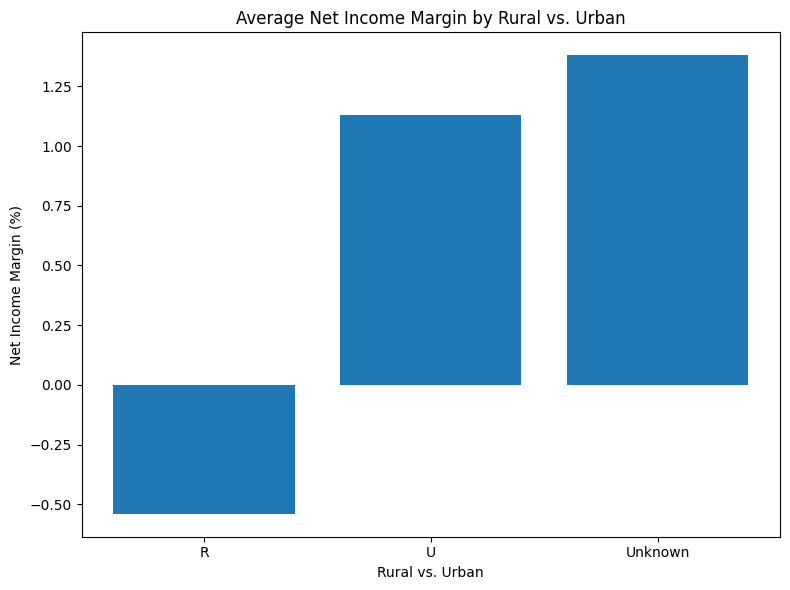

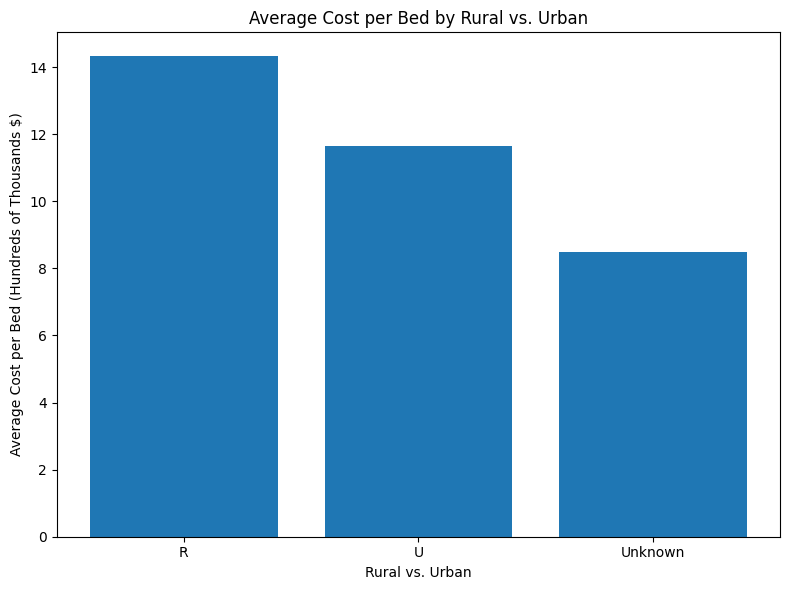

In [343]:
## Net Income Margin by Rural vs. Urban
margin_rural_urban = df.groupby('Rural Versus Urban')['Net Income Margin'].mean().round(2)
plt.figure(figsize=(8, 6))
plt.bar(margin_rural_urban.index, margin_rural_urban)
plt.title('Average Net Income Margin by Rural vs. Urban')
plt.xlabel('Rural vs. Urban')
plt.ylabel('Net Income Margin (%)')
plt.tight_layout()
plt.show()

# Cost per Bed by Rural vs. Urban (in hundreds of thousands)
cost_per_bed_rural_urban = (df.groupby('Rural Versus Urban')['Cost per Bed'].mean() / 100_000).round(2)
plt.figure(figsize=(8, 6))
plt.bar(cost_per_bed_rural_urban.index, cost_per_bed_rural_urban)
plt.title('Average Cost per Bed by Rural vs. Urban')
plt.xlabel('Rural vs. Urban')
plt.ylabel('Average Cost per Bed (Hundreds of Thousands $)')
plt.tight_layout()
plt.show()

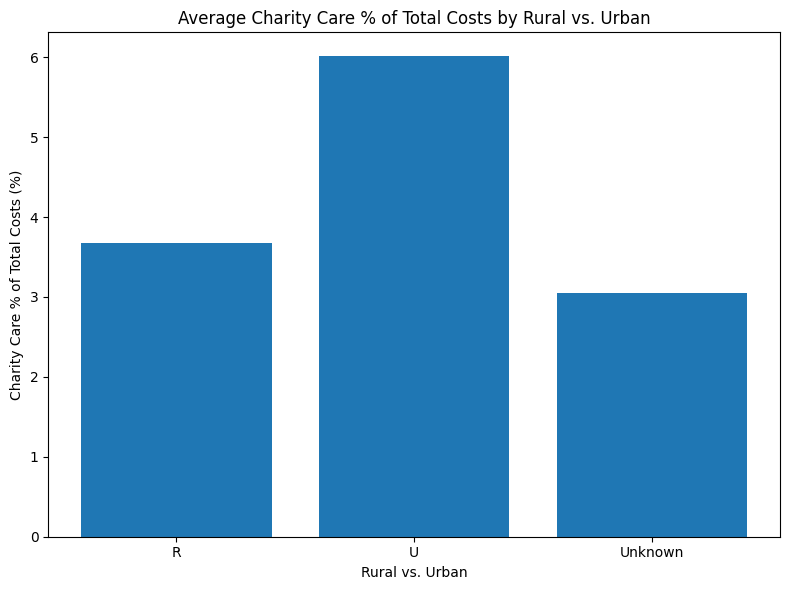

In [344]:
# Charity Care % of Total Costs by Rural vs. Urban
charity_pct_rural_urban = df.groupby('Rural Versus Urban')['Charity Care % of Total Costs'].mean().round(2)
plt.figure(figsize=(8, 6))
plt.bar(charity_pct_rural_urban.index, charity_pct_rural_urban)
plt.title('Average Charity Care % of Total Costs by Rural vs. Urban')
plt.xlabel('Rural vs. Urban')
plt.ylabel('Charity Care % of Total Costs (%)')
plt.tight_layout()
plt.show()


**Guiding Questions:**
- What patterns do you see?
- How can these patterns contribute to further insights?

***Patterns and Insights requiring further analysis***<br>
A pattern I see is that the Urban hospitals on average are more efficient and charitable. This can be further investigated to find out WHY they are more profitable. The above charts show that the Urban hospitals have a profit margin between 1& and 1.25%, while Rural hospitals have a net loss margin of about 0.5% (or net profit margin of -0.5%) in 2022. Contrasting this against cost per bed and charitable care as a % of total costs, shows us that the rural hospitals, on average are not as efficient. This can be for many different reasons that could be investigated further. Is it because of access to resources? Economies of scale? or that specialized (and typically more expensive care) is typically located in urban areas?



## 6. Deriving Insights

In this section, derive six insights from the data. Each insight should have:
- A brief description of what you are examining.
- The code used to calculate or visualize it.
- A short analysis of the results and how they contribute to understanding the data.
- Visuals can be used to aid your insights as well.


### Insight 1

**Insight Description: I want to see on average, what is the cost per bed daily and annually in both Rural and urban areas in $USD** <br>

**Analysis:** _This will allow us to see the average cost per bed as incurred by the hospital based on region. This is helpful to see the specific average cost per region. This could be used by management for benchmarking and later comparitive analysis. (It they want to implement a new system or process, these could be baselines)_<br>


In [345]:
# Calculate average cost per bed by Rural vs. Urban
avg_cost_per_bed = df.groupby('Rural Versus Urban')['Cost per Bed'].mean()

# Print results as USD
print("\nAverage Cost per Bed (USD):")
for area, cost in avg_cost_per_bed.items():
    if area in ['R', 'U']:  # Exclude the unknowns
        area_name = 'Rural' if area == 'R' else 'Urban'
        print(f"{area_name}: Hospital cost per year ${cost:,.2f}")

# Calculate cost per bed per day

df['Cost per Bed per Day'] = df['Cost per Bed'] / 365

# Calculate average cost per bed per day by Rural vs. Urban
avg_cost_per_bed_day = df.groupby('Rural Versus Urban')['Cost per Bed per Day'].mean()

# Print as USD
print("\nAverage Cost per Bed per Day (USD):")
for area, cost in avg_cost_per_bed_day.items():
    if area in ['R', 'U']:  # Exclude the unknowns 
        area_name = 'Rural' if area == 'R' else 'Urban'
        print(f"{area_name}: ${cost:,.2f}")


Average Cost per Bed (USD):
Rural: Hospital cost per year $1,431,894.89
Urban: Hospital cost per year $1,165,315.14

Average Cost per Bed per Day (USD):
Rural: $3,923.00
Urban: $3,192.64



### Insight 2

**Insight Description: Net income per bed; daily and annually by region**<br>

 Since we now know what the bed is costing the hospitals per day and per year, it is helpful to see what theyre netting per day and per year, I chose net on this instead of total income because without normalizing the services offered (heart surgeons make more than family care doctors, but also perform higher value services) or breaking it down by Hospital size or funding it would be nearly impossible to determine the true financial efficiency._ <br>
**Analysis:** _Again, much like the last one I think this is a valuable metric to understand overall profitability, efficiency and can be used as a comparative benchmark by management._<br>


In [346]:
# Calculate average Net Income per Bed by Rural vs. Urban
avg_net_income_per_bed = df.groupby('Rural Versus Urban')['Net Income per Bed'].mean()

# Print results formatted as USD
print("\nAverage Net Income per Bed (USD):")
for area, income in avg_net_income_per_bed.items():
    if area in ['R', 'U']:  # Only show Rural (R) and Urban (U)
        area_name = 'Rural' if area == 'R' else 'Urban'
        print(f"{area_name}: ${income:,.2f}")

# Calculate Net Income per Bed per Day
df['Net Income per Bed per Day'] = df['Net Income per Bed'] / 365

# Calculate average Net Income per Bed per Day by Rural vs. Urban
avg_net_income_per_bed_day = df.groupby('Rural Versus Urban')['Net Income per Bed per Day'].mean()

# Print results formatted as USD
print("\nAverage Net Income per Bed per Day (USD):")
for area, income in avg_net_income_per_bed_day.items():
    if area in ['R', 'U']:  # Only show Rural (R) and Urban (U)
        area_name = 'Rural' if area == 'R' else 'Urban'
        print(f"{area_name}: ${income:,.2f}")


Average Net Income per Bed (USD):
Rural: $-19,483.39
Urban: $33,811.36

Average Net Income per Bed per Day (USD):
Rural: $-53.38
Urban: $92.63



### Insight 3

**Insight Description: Net income margin as a percent and in terms of annual net income  ($USD)**<br>

**Analysis:** _This shows us which hospital types are the most profitable in terms of profit margin and Annual net income in $USD. Typically, major hospitals are ran as a medical group or a network. So understanding which hospitals are your money makers and which are not typically as profitable can help upper managment guide strategic investments into certian care facilites to ofset overall loss. Operating in this space is often a balance of Philanthropy and meeting shareholder expectations._<br>

In [347]:
#Calculate average Net Income Margin by CCN Facility Type
avg_net_income_margin = df.groupby('CCN Facility Type')['Net Income Margin'].mean()

# Print results formatted as percentage
print("\nAverage Net Income Margin by CCN Facility Type (%):")
for facility_type, margin in avg_net_income_margin.items():
    print(f"{facility_type}: {margin:.2f}%")

# Calculate average Net Income by CCN Facility Type
avg_net_income = df.groupby('CCN Facility Type')['Net Income'].mean()

# Print results formatted as USD
print("\nAverage Net Income by CCN Facility Type (USD):")
for facility_type, income in avg_net_income.items():
    print(f"{facility_type}: ${income:,.2f}")


Average Net Income Margin by CCN Facility Type (%):
Children’s Hospitals: 7.07%
Critical Access Hospitals: 2.28%
Hospitals participating in operating room demonstration project: 30.94%
Long-Term Care Hospitals: -3.00%
Psychiatric Hospitals: -16.28%
Rehabilitation Hospitals: 12.04%
Religious Non-medical Health Care Institutions: -23.17%
Short-term (General and Specialty) Hospitals: 1.73%

Average Net Income by CCN Facility Type (USD):
Children’s Hospitals: $48,234,762.55
Critical Access Hospitals: $647,495.32
Hospitals participating in operating room demonstration project: $23,563,691.12
Long-Term Care Hospitals: $-1,926,571.20
Psychiatric Hospitals: $-10,577,950.99
Rehabilitation Hospitals: $3,071,513.44
Religious Non-medical Health Care Institutions: $-1,099,234.80
Short-term (General and Specialty) Hospitals: $13,334,955.98



### Insight 4

**Insight Description: Net income per bed per night by facility type.** <br>

**Analysis:** _This can be used to find issues on a more macro level. If management were looking at one specific hospital, they could compare and contrast them with the national averages and see if that particlular hospital is under or over performing for this current year. This is important as it eliminates regional or specific economic pressures. Without the data being broken out it shows us the overall health of the system as a whole, which could be compared to one practice. This can be particularly helpful when looking at billing structures to insurance or the private parties. This data can allow the hospitals to negotiate their rates and make sure they're billing properly_<br>

In [348]:
# Calculate Net Income per Bed per Night 
df['Net Income per Bed per Night'] = df['Net Income per Bed'] / 365

# Calculate average Net Income per Bed per Night by CCN Facility Type
avg_net_income_per_bed_night = df.groupby('CCN Facility Type')['Net Income per Bed per Night'].mean()

# Print results as USD
print("\nAverage Net Income per Bed per Night by CCN Facility Type (USD):")
for facility_type, income in avg_net_income_per_bed_night.items():
    print(f"{facility_type}: ${income:,.2f}")


Average Net Income per Bed per Night by CCN Facility Type (USD):
Children’s Hospitals: $448.67
Critical Access Hospitals: $31.31
Hospitals participating in operating room demonstration project: $2,559.35
Long-Term Care Hospitals: $-48.86
Psychiatric Hospitals: $-237.14
Rehabilitation Hospitals: $131.53
Religious Non-medical Health Care Institutions: $-250.83
Short-term (General and Specialty) Hospitals: $59.28



### Insight 5

**Insight Description: Calculating Net income per bed per night by region** <br>

**Analysis:** _This tells us the geographical location of the hospitals by facility types. This is important beacuse this can help further fine tune later analysis. As discussed before, typically hospitals in urban enviornments operate at a higher volume, have access to more resources and may more easily achieve an econmony of scale. This can help management compare and contrast the diferent models in each region. Are my margins better for a Short term general hospital? Since this is the case it may be better to place it into a rural envionrmrnt where there is more margin to eat up to ofset the lack of volume or lack of resources. On the opposite end, if a certian facility has razor thin margins, you may benefit from placing it in a more urban enviornment where it can benefit from the volume and ease of access to resources_<br>

In [349]:
#Calculate Net Income per Bed per Night 
df['Net Income per Bed per Night'] = df['Net Income per Bed'] / 365

# Calculate average Net Income per Bed per Night by Rural vs. Urban and CCN Facility Type
avg_net_income_per_bed_night = df.groupby(['Rural Versus Urban', 'CCN Facility Type'])['Net Income per Bed per Night'].mean()

# Sort the results from highest to lowest
avg_net_income_per_bed_night = avg_net_income_per_bed_night.sort_values(ascending=False)

# Print results formatted as USD
print("\nAverage Net Income per Bed per Night by CCN Facility Type and Region (USD):")
for (region, facility_type), income in avg_net_income_per_bed_night.items():
    # Only show Rural (R) and Urban (U) regions
    if region == 'R':
        region_name = 'Rural'
        print(f"{region_name} - {facility_type}: ${income:,.2f}")
    if region == 'U':
        region_name = 'Urban'
        print(f"{region_name} - {facility_type}: ${income:,.2f}")


Average Net Income per Bed per Night by CCN Facility Type and Region (USD):
Urban - Hospitals participating in operating room demonstration project: $2,559.35
Urban - Children’s Hospitals: $634.50
Urban - Short-term (General and Specialty) Hospitals: $189.40
Rural - Rehabilitation Hospitals: $183.72
Urban - Rehabilitation Hospitals: $130.05
Rural - Critical Access Hospitals: $52.77
Rural - Long-Term Care Hospitals: $28.42
Urban - Long-Term Care Hospitals: $-53.42
Rural - Short-term (General and Specialty) Hospitals: $-147.28
Urban - Critical Access Hospitals: $-224.28
Urban - Psychiatric Hospitals: $-239.31
Urban - Religious Non-medical Health Care Institutions: $-321.57
Rural - Psychiatric Hospitals: $-392.35


### Notice - There are some descrpencies between like kind facilities in the different regions<br>
 - **Rual Rehabilitation Hospitals** (183.72) and **Urban Rehabilitation Hospitals** (130.05)
 - **Rural Long-Term Care Hospitals** (28.4) and **Urban Long-Term Care Hospitals** (-53.42)
These are examples of practices management may want to examine closer to find out why these differences are occuring. Knowing that the urban hospitals typically have better margins, why did these specific CCNs in urban areas not perfrom as expected? Is there a billing problem, staffing or utilization problem? 


## 7. Summary and Conclusions

Summarize your findings and highlight the most impactful insights you derived from the data.

**Guiding Questions:**
- What key takeaways did you learn from this data?
- How can these insights inform future decisions?
- Are there any limitations in your analysis?


### Conclusion of Insights:<br>
 In 2022 urban hospitals had superior efficiency and profitability, with specialty and demo project hospitals leading in net income and margins. Rural hospitals, particularly general care facilities, face losses, showcasing a potential need for operational or strategic interventions. The insights provide actionable benchmarks for management, supporting investment, billing, and facility placement decisions. <br>

 Things that would bolster this analysis is more data; if we had a 5 year window of data to look at we would be able to get a better picture of true effeciency. <br>There are many external and internal factors which can cause a loss in just one year, (key employee turnover, investments in PPE, or supply chain constraints), but if we had more years to look at it could help us further determine if a practice is inefficent or just had a bad operating year.<br>
 Another thing that could have bolstered our analysis is data regarding to length of average visit and patient statisfaction surveys. Typically in rural practices the pace of care is slower, they do not have nearly as much volume or constraints for beds. Due to this people whom are hospitalized in rural areas often can stay longer and may receive more personalized care. This is where having length of stay data and patient staisfaction surveys would greatly bolster our analysis and help us make informed decsions. <br>



## 8. Projections

Finally, tell us something that can be learned from this analysis to make better decisions going forward. 

**Insight Description:** <br>
**How can hospital networks use the identified efficiency and profitability differences between urban and rural hospitals, particularly by Facility Type, to strategically invest in or optimize facilities in the future, ensuring a balance between financial performance and community healthcare needs?** <br>

**Analysis:** The analysis shows urban specialty hospitals (ie., Children’s Hospitals: $634.50 per bed per night, Operating Room Demo: $2,559.35) and rural Rehabilitation Hospitals ($183.72) are profitable, while rural Short-term Hospitals (-$147.28) and urban Psychiatric Hospitals (-$239.31) incur losses. However with the given dataset losses may stem from one-year issues (ie., supply chain) or inefficiencies (e.g., lower volume, longer stays), but more data is needed to confirm.

With these insights hospital networks can:
1. **Prioritize High-Margin Facilities**: Invest in urban Children’s and Operating Room Demo hospitals and rural Rehabilitation Hospitals to maximize profitability.
2. **Optimize Rural Operations**: Reduce rural costs per bed ($3,923.00/day) through shared resources or telemedicine, or convert Short-term Hospitals to Rehabilitation Hospitals.
3. **Balance Community Needs**: Use urban profits to subsidize rural general care hospitals, ensuring access.
4. **Collect More Data**: Gather multi-year data, length-of-stay, and patient satisfaction to confirm inefficiencies and optimize care delivery.<br>


**Instructions for Submission:**

- Submit the completed `.ipynb` file, dataset, and link to dataset in Canvas. (link only is fine if dataset is too big)


## Grading Critiria

Below are some of the critiria that I will be using when grading the final case. Keep in mind, no one part has a specific weight.

| **Section**          | **Description**                                                                                                                                             |
|----------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Dataset Quality**  | Does the dataset meet the length and complexity requirements(Unless previously cleared and discussed with insturctor)? Note that redundant datasets used in prior assignments result in an automatic 15% penalty.                                                                                               |
| **Data Ingestion**   | Demonstrates a well-structured process using Python to import, explore, and clean the data.                                                                 |
| **Data Cleanup**     | Clearly explains how data was cleaned (if necessary) to prepare it for analysis.                                                                            |
| **Analysis**         | - Utilizes a variety of modules and functions to analyze the cleaned dataset.                                                                               |
|                      | - You and your partner must provide at least six (6) insights derived from the analysis. (9 insights if a group of 3)                                                                   |
|                      | - Insights should reveal something not initially obvious from the raw data.                                                                                 |
|                      | - Present each insight with code execution, printed data tables, visuals, etc., and explain the process and significance.                                   |
| **Conclusion**       | Synthesizes your insights to explain the overall story the data tells.                                                                                      |
|                      | Discusses the importance of the data and general conclusions that can be drawn.                                                                             |
| **Projection**       | Takes the analysis further by considering its application in a real-world context.                                                                          |
|                      | Provides recommendations for stakeholders on how the findings can inform better, more informed decisions in the future.                                     |
|----------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Overall Presentation Quality**                     | How descriptive your explanations in the file are and the verbal presentation piece.                                    |
